# **Bank Customer Churn Prediction**

## **Business Problem**

### Description:

Customer churn is a business term known as customer agitation. In business, when customers are dissatisfied with the service or product that is provided, attrition will occur. Customer churn hurts businesses since it can result in large premium losses, decreased profit margins, and possibly lost referral business from loyal clients. Hence customer retention is important for businesses.

Data collection and analysis allows us to identify customers who may be about to leave a business, thereby focusing on customer retention rather than attracting new clients.    

Here, we use different machine learning models such as k-means clustering, k-nearest neighbors, logistic regression, decision tree , random forest, and support vector machine to predict the churn.

### Problem Statement:

Build models to predict the customer churn and find out the best one with highest prediction accuracy

Source :https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

### Exploratory Data Analysis

In [1]:
# Importing necessary packages and library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To ignore any warnings
import warnings                             
warnings.filterwarnings("ignore")

In [2]:
#reading the dataframe
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
#check for instances and attributes count
df.shape

(10000, 12)

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Descriptive summary of the dataset
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


customer_id attribute is unique for each observation hence droping the column

In [7]:
# Checking for missing data
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
#Dropping customer Id since it is randomly allocated and not useful for prediction
df.drop(["customer_id"],axis=1,inplace = True)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# Checking for any duplicate values
df.duplicated().sum()

0

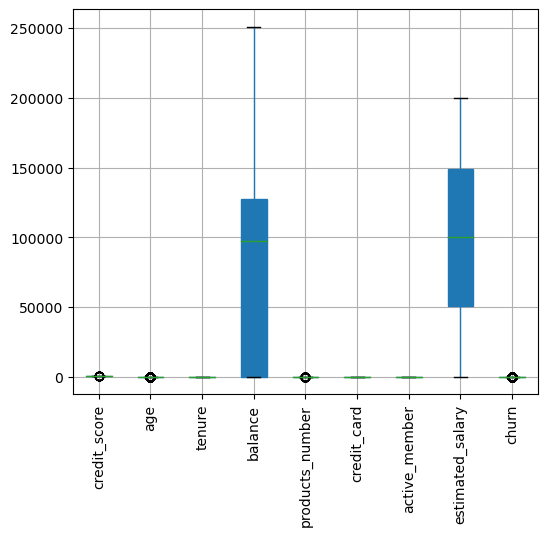

In [10]:
#Outliers check
plt.figure(figsize=(6,5))
df.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

### Data Visualisation

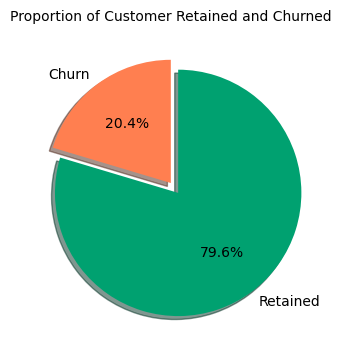

In [11]:
labels = 'Churn', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
colors = ['#FF7F50', '#00A170']
fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)
#ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda p:f'{p:.1f}% ({p*sum(sizes)/100 :.0f})',shadow=True, startangle=90, colors = colors)
plt.title("Proportion of Customer Retained and Churned", size = 10)
plt.show()

We can see nearly 20% of the customers are likely to churn.

<Axes: >

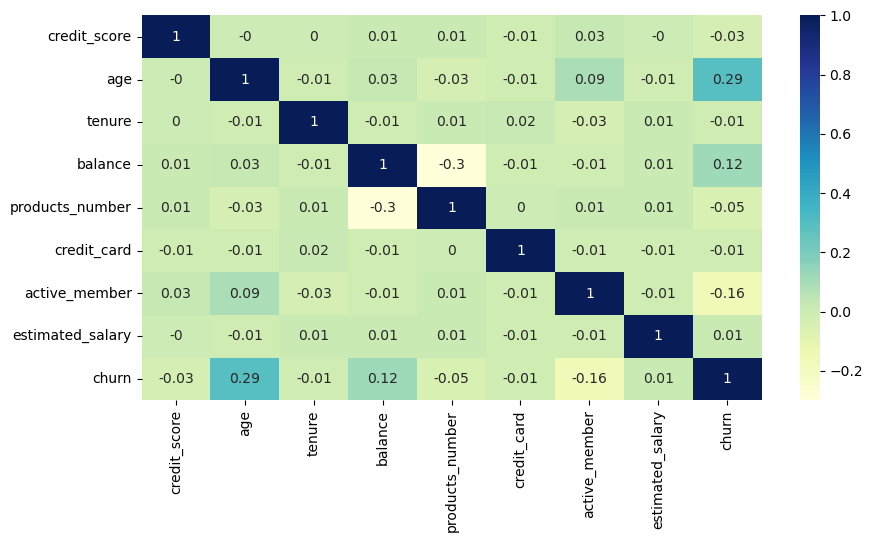

In [12]:
#Finding the correlation between the variables
df_corr = df.corr().round(2)
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot=True,cmap='YlGnBu')


### Categorical Variables

<Axes: xlabel='churn', ylabel='count'>

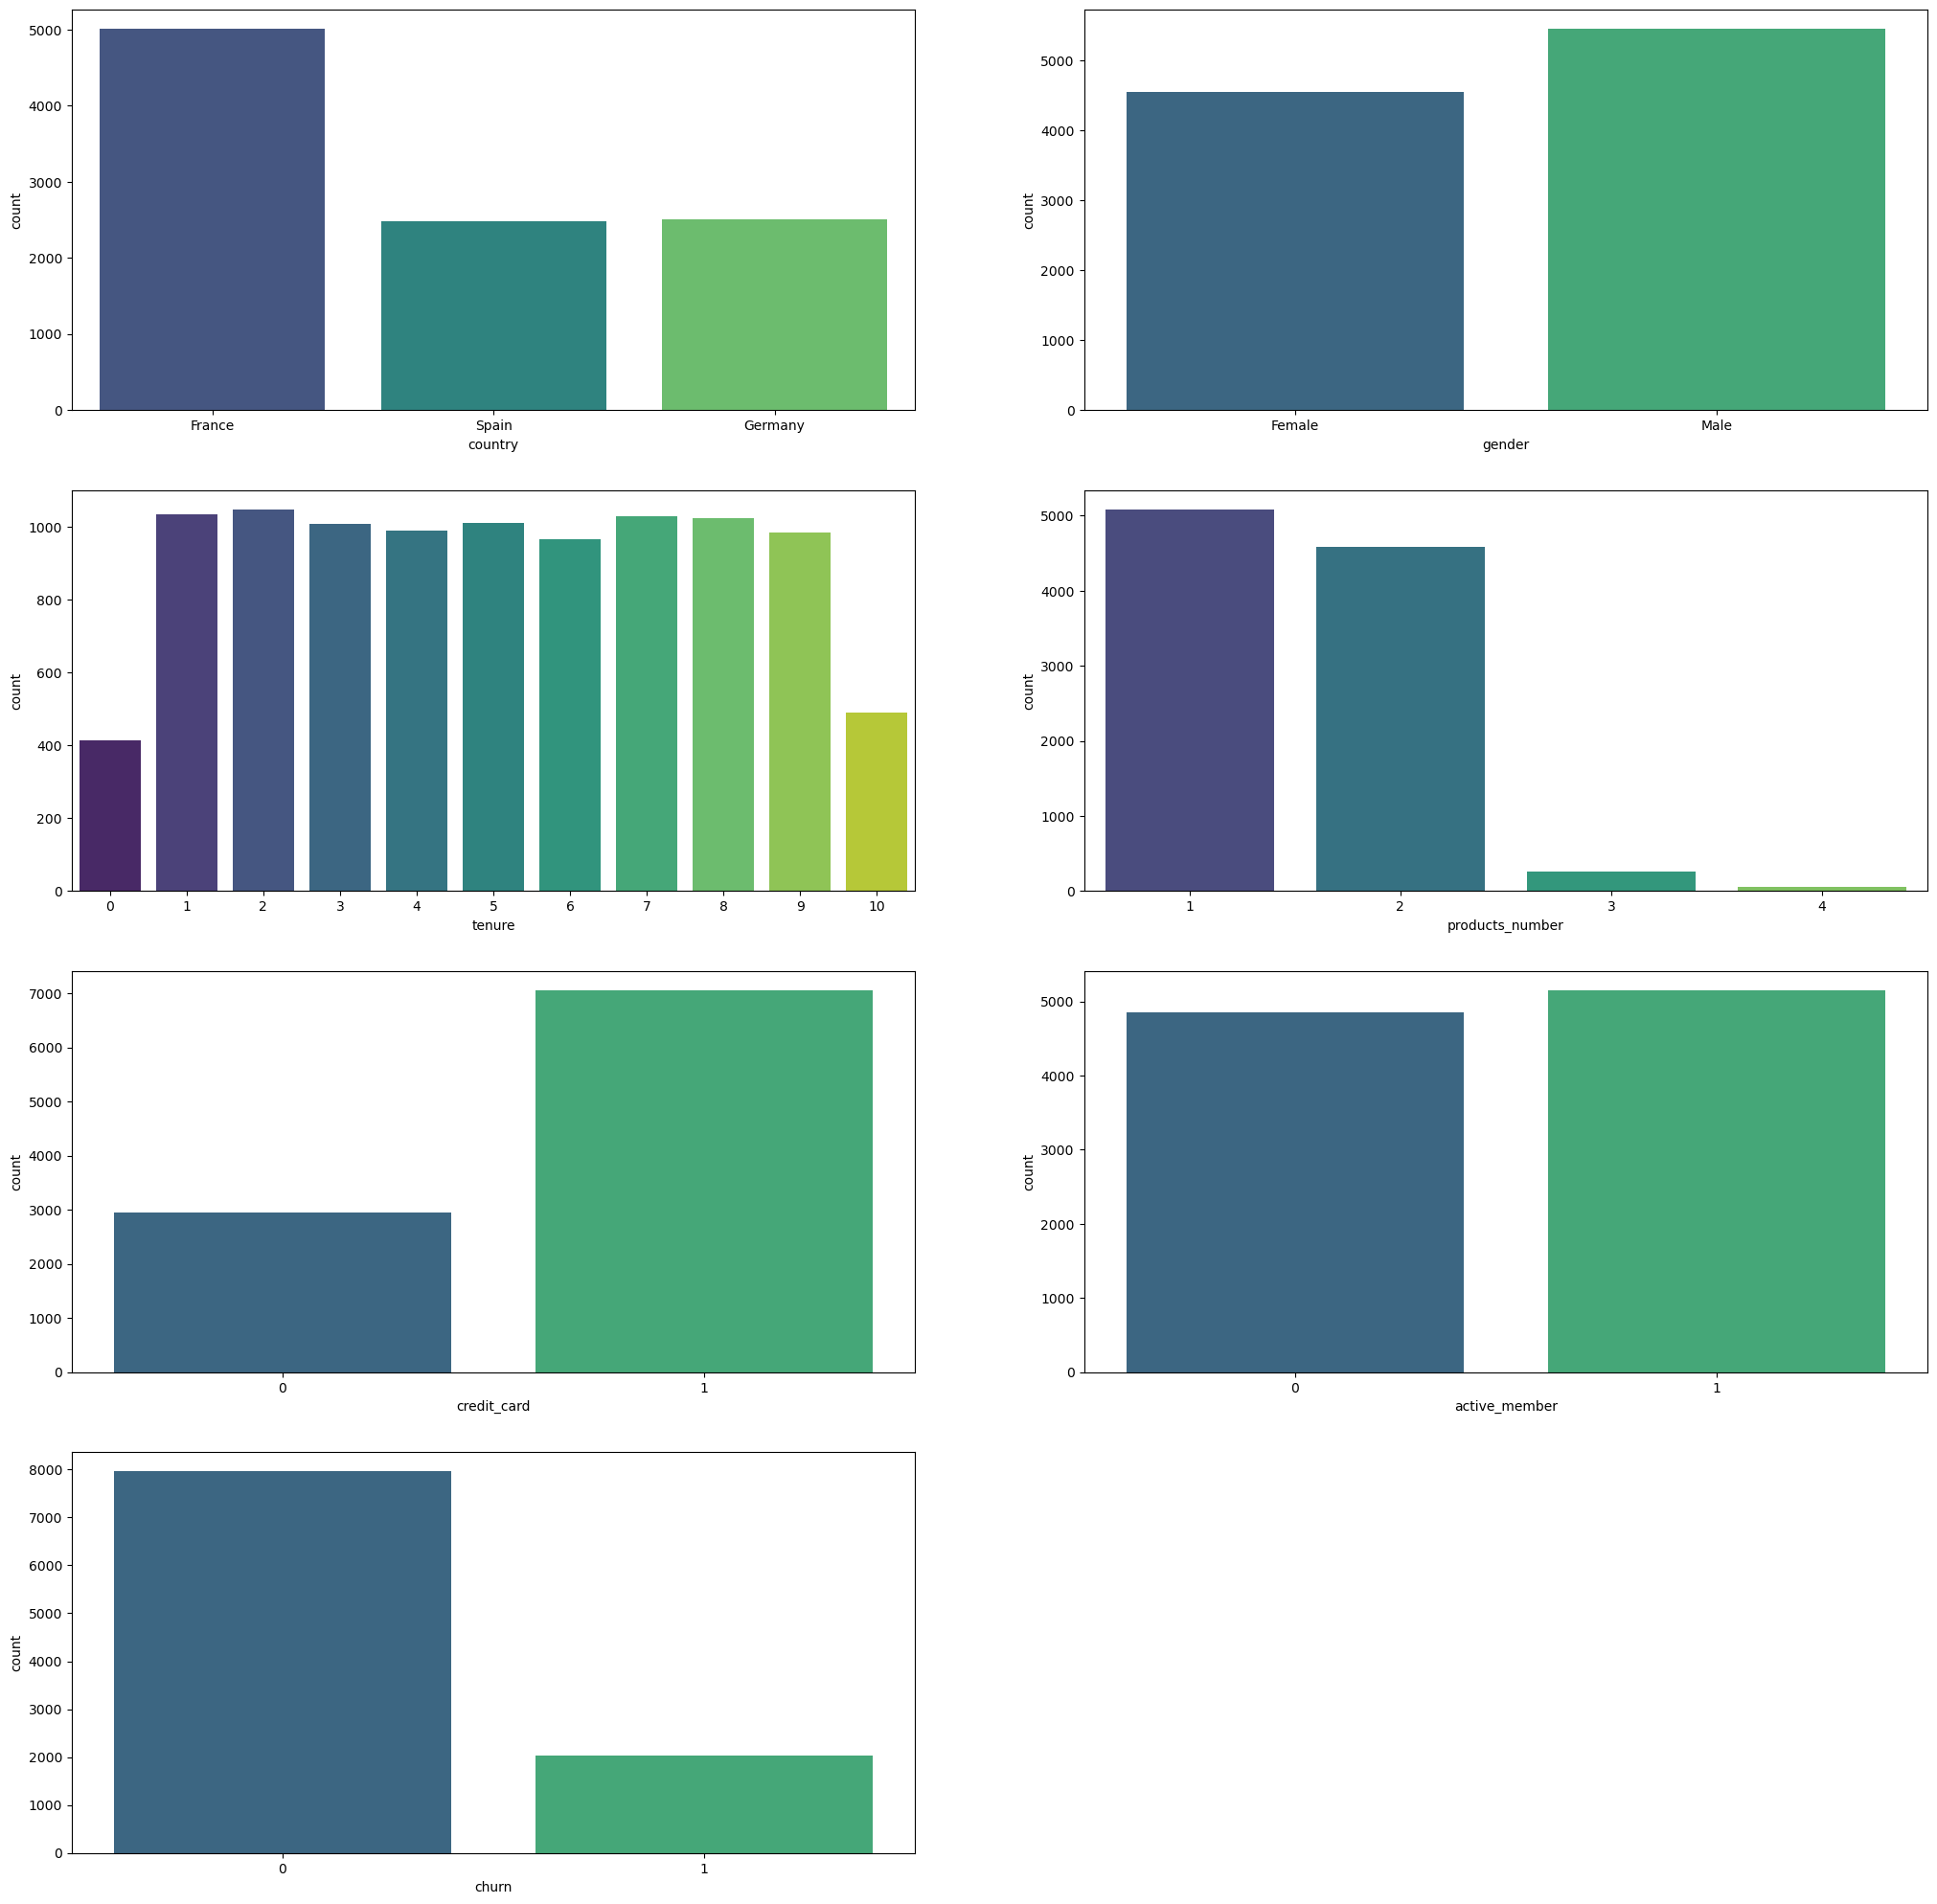

In [13]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'country', palette= 'viridis',data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', palette='viridis', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', palette='viridis', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', palette='viridis', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', palette='viridis', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', palette='viridis', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', palette='viridis', data = df)

Looking at our categorical variables individually, we were able to verify that our base has a predominance of French population, we have a slight amount of men greater than women, looking at the tenure variable we can see that we have a good distribution taking the values ​​0 and 10, looking at the variable product_number we can see that we have a predominance in products 1 and 2, we can also verify that most transactions are made by credit card, when we look at our target variable we can see that we have much more negative values ​​than positive ones.

### Continuous variable

<Axes: xlabel='estimated_salary', ylabel='Count'>

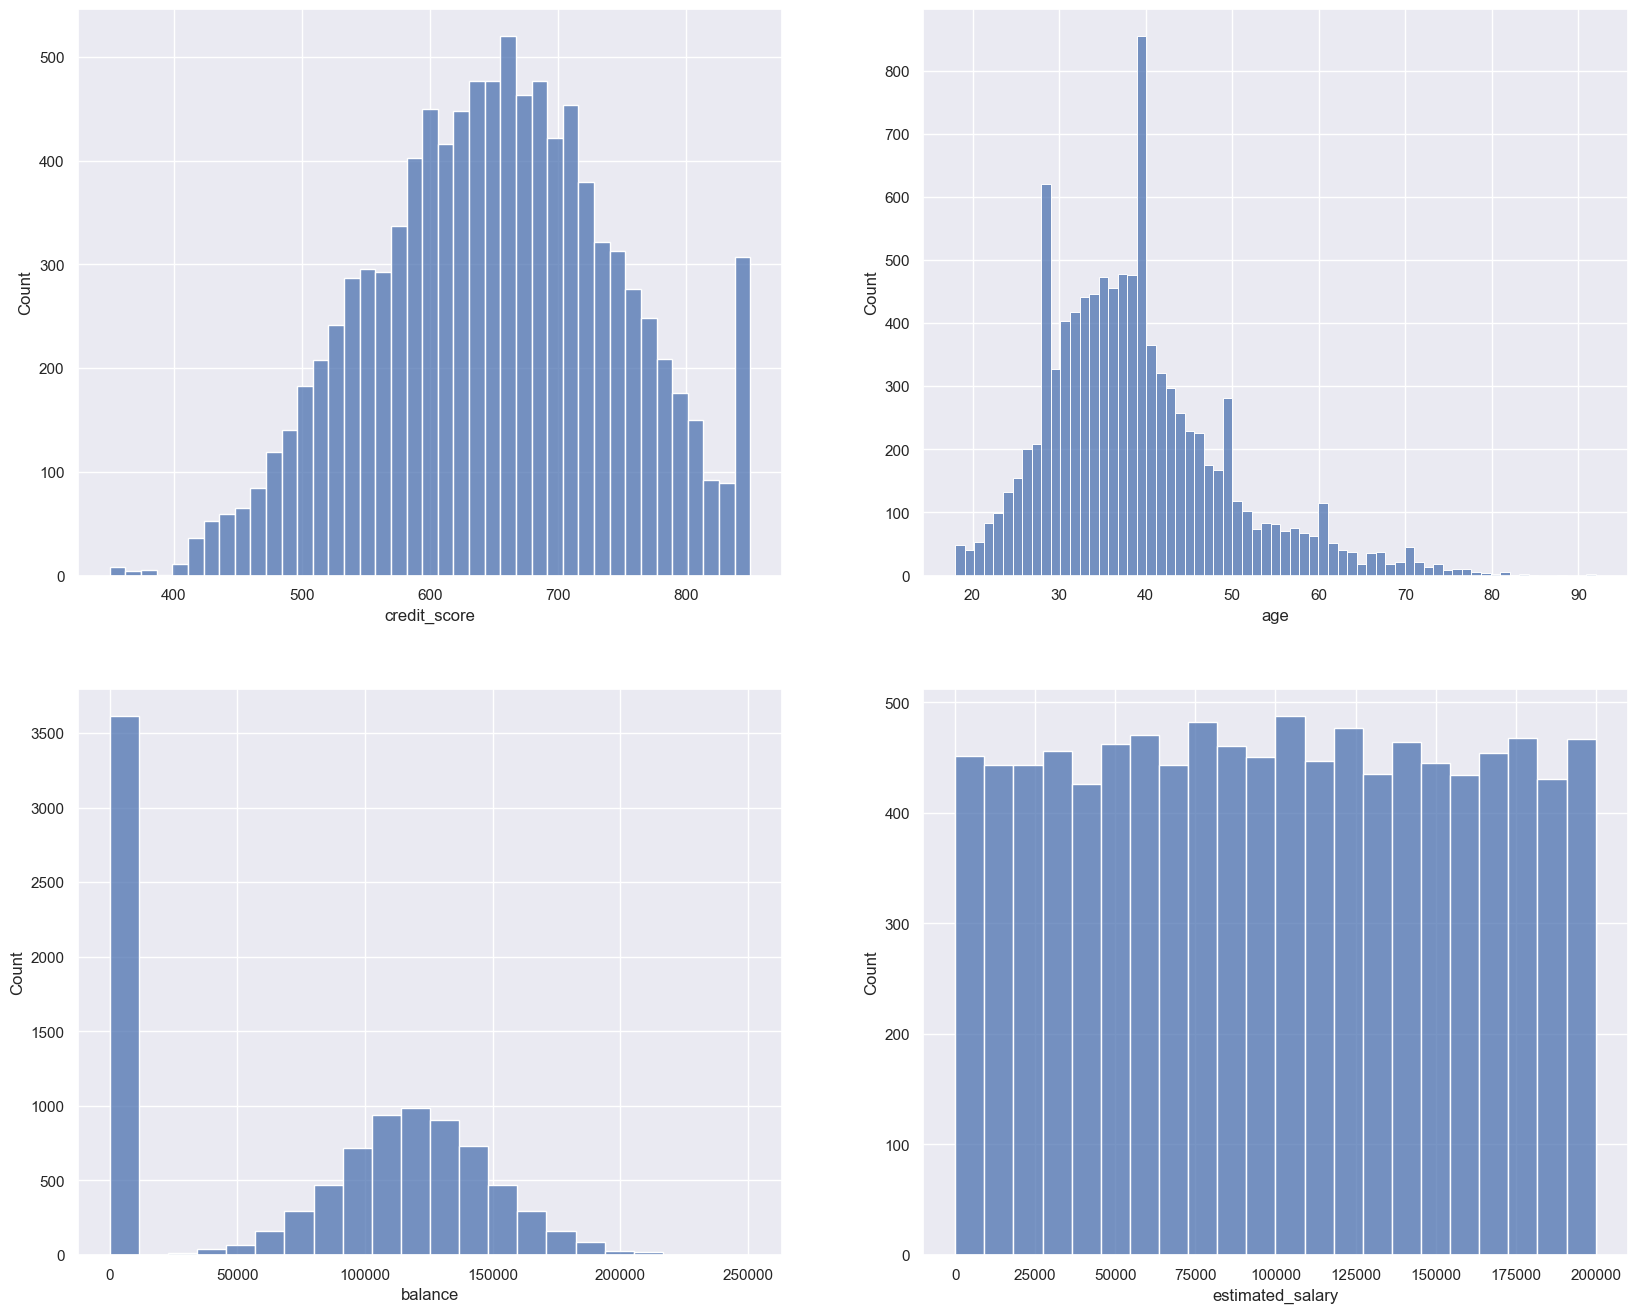

In [14]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.histplot(df['credit_score'])

plt.subplot(3,2,2)
sns.histplot(df['age'])

plt.subplot(3,2,3)
sns.histplot(df['balance'])

plt.subplot(3,2,4)
sns.histplot(df['estimated_salary'])

Looking at our categorical variables, we can see that our credit score variable is practically a normal distribution, most people in our base are between 20 and 40 years old, we have a large number of people who have no value on the balance sheet, and when we look at the variable salary we have well distributed values.

### Bivariate Analysis

<Axes: xlabel='churn', ylabel='count'>

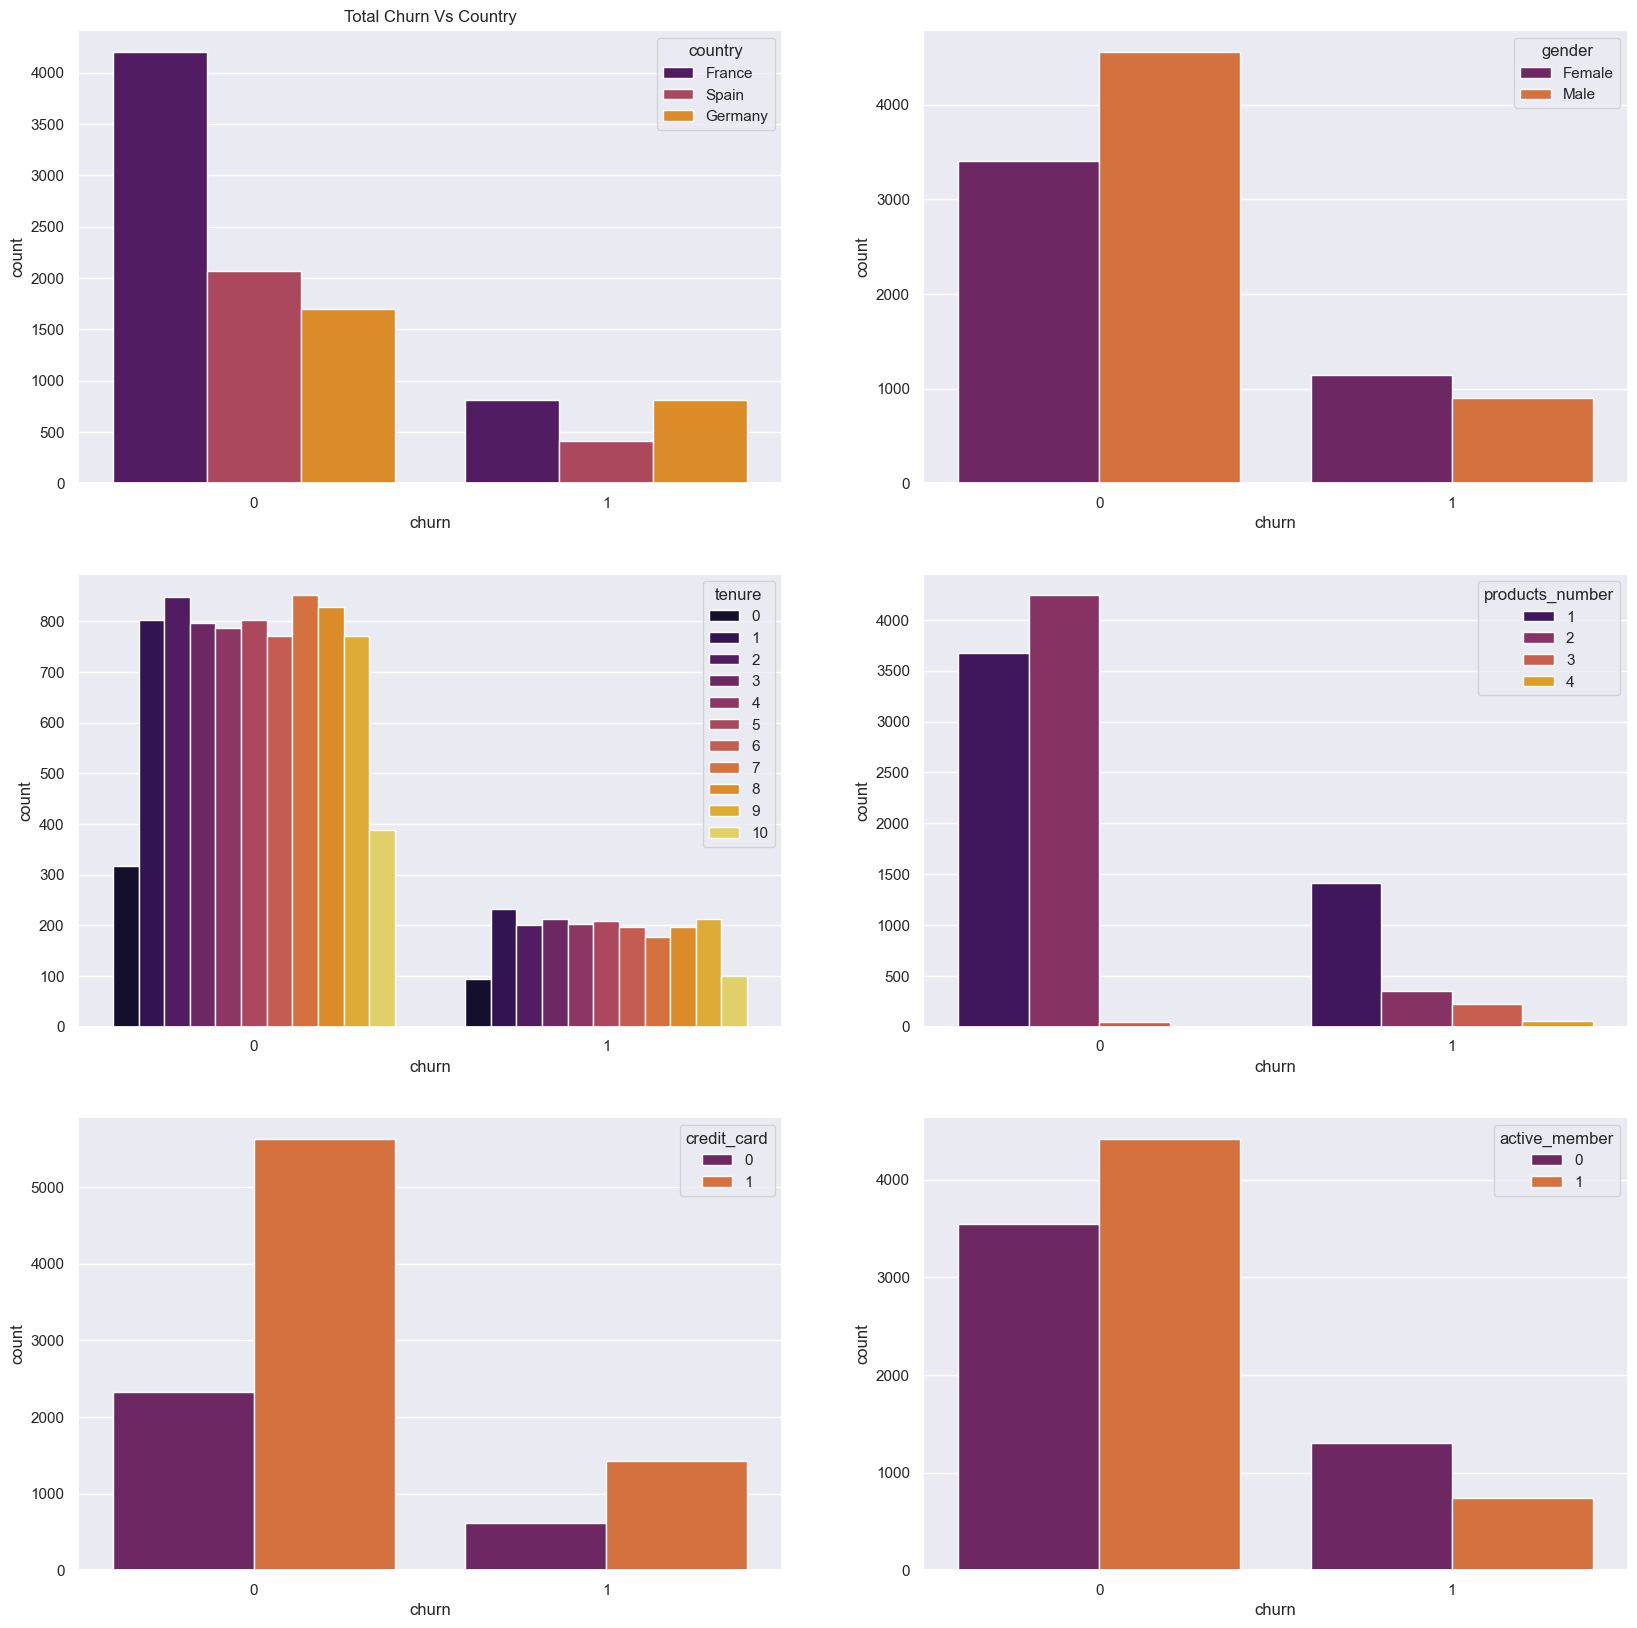

In [15]:
#categorical hue
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'country', palette='inferno', data = df)
plt.title("Total Churn Vs Country")

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'gender', palette='inferno', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'tenure', palette='inferno', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'products_number', palette='inferno', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='inferno', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'churn', hue= 'active_member', palette='inferno', data = df)

In our bivariate analysis we were able to get some insights, product 2 despite having a lot of samples generally does not have a churn problem, men and women are well distributed in churn values, and the other variables are also well distributed.

In [16]:
#Numerical hue

<Axes: xlabel='churn', ylabel='credit_score'>

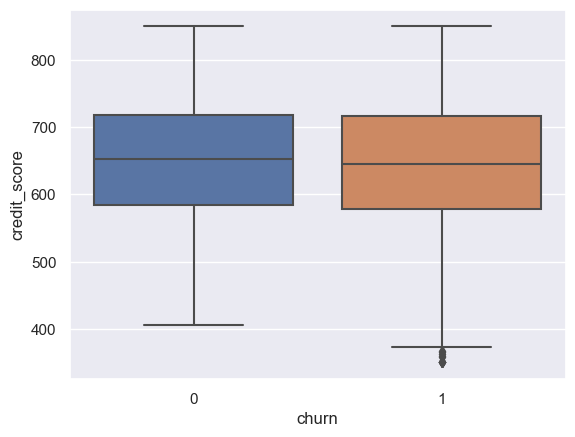

In [17]:
sns.boxplot(x=df['churn'],y=df['credit_score'])

When we look at the credit score variable, we can't see much difference between the scores and the chance of churn.

<Axes: xlabel='churn', ylabel='age'>

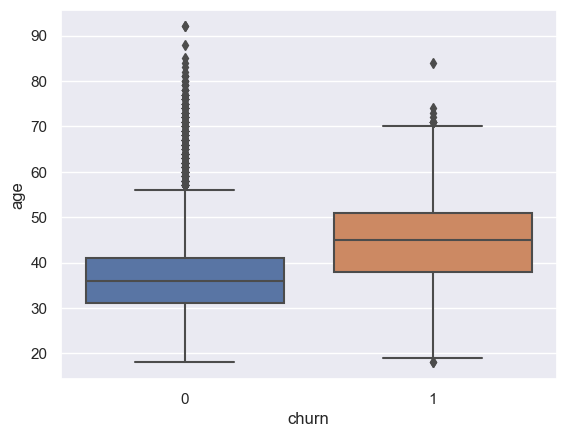

In [18]:
sns.boxplot(x=df['churn'],y=df['age'])

Older people are more likely to churn

<Axes: xlabel='churn', ylabel='balance'>

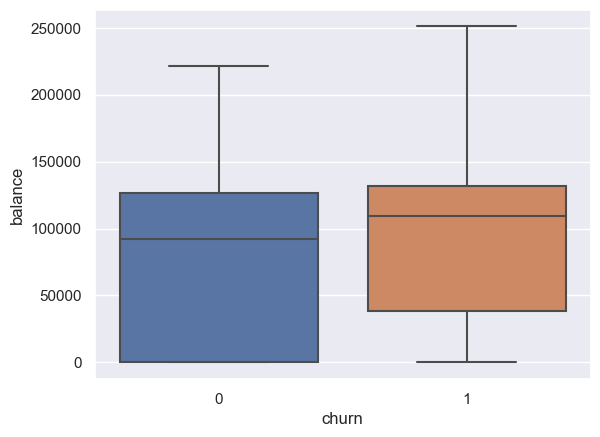

In [19]:
sns.boxplot(x=df['churn'],y=df['balance'])

There is no much difference between balance and chances of churn.

<Axes: xlabel='churn', ylabel='estimated_salary'>

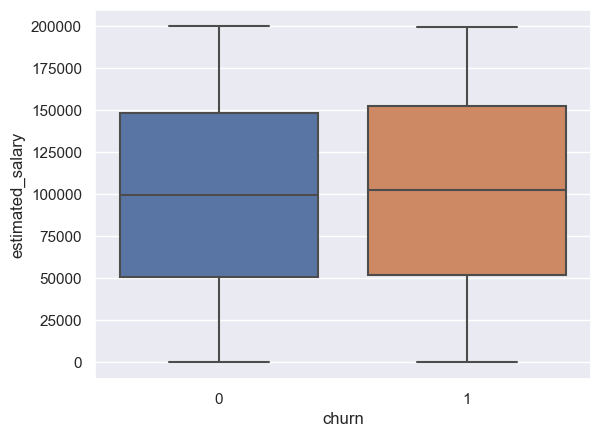

In [20]:
sns.boxplot(x=df['churn'],y=df['estimated_salary'])

There is no much difference between estimated salary and chances of churn.

In [21]:
X = df.iloc[:,0:10]
y = df.iloc[:,10]

In [22]:
#Handling Imbalanced Dataset using Ramdom Over Sampler
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_over, y_over = oversampler.fit_resample(X,y)

In [23]:
X_over

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
15921,593,Germany,Female,62,3,118233.81,1,0,1,24765.53
15922,468,France,Female,56,10,0.00,3,0,1,62256.87
15923,722,France,Female,49,3,168197.66,1,1,0,140765.57
15924,780,France,Female,37,3,0.00,2,0,0,182156.81


In [24]:
#Encoding of Categorical to Continuous Variable
'''from sklearn.preprocessing import LabelEncoder
le_country = LabelEncoder()
le_gender = LabelEncoder()'''

X_over = pd.get_dummies(X_over)

In [25]:
X_over

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,593,62,3,118233.81,1,0,1,24765.53,0,1,0,1,0
15922,468,56,10,0.00,3,0,1,62256.87,1,0,0,1,0
15923,722,49,3,168197.66,1,1,0,140765.57,1,0,0,1,0
15924,780,37,3,0.00,2,0,0,182156.81,1,0,0,1,0


In [26]:
# Scaling the features in the same range
from sklearn.preprocessing import MinMaxScaler
col = ['credit_score','age','balance','estimated_salary']
mms = MinMaxScaler()
X_over[col] = mms.fit_transform(X_over[col])

In [27]:
X_over

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,0,0,1,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,0,1,1,0
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,0,0,1,0
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,1,0,0,1,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,0.486,0.594595,3,0.471242,1,0,1,0.123782,0,1,0,1,0
15922,0.236,0.513514,10,0.000000,3,0,1,0.311256,1,0,0,1,0
15923,0.744,0.418919,3,0.670382,1,1,0,0.703837,1,0,0,1,0
15924,0.860,0.256757,3,0.000000,2,0,0,0.910813,1,0,0,1,0


In [28]:
# Considering 20% of the data for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.2,random_state=0)

In [29]:
X_train.shape,y_train.shape

((12740, 13), (12740,))

In [30]:
X_test.shape,y_test.shape

((3186, 13), (3186,))

## Prediction with ML models

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(pred,y_test)

0.7102950408035154

In [33]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(pred,y_test)

0.7969240426867545

In [34]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(pred,y_test)

0.903954802259887

In [35]:
model = RandomForestClassifier(n_estimators = 200, random_state=200)
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(pred,y_test)

0.9441305712492153